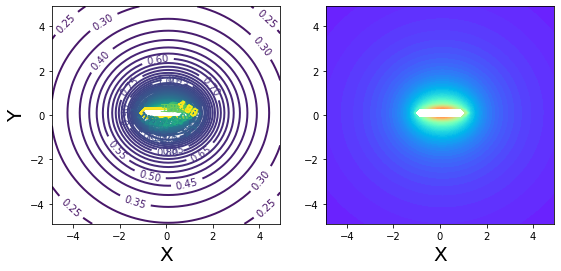

In [1]:
import numpy as np
import matplotlib.pyplot as pl

#--------defining a function-----------
def f(x,x0,y0):
    return np.exp(-x**2)/np.sqrt((x-x0)**2+y0**2)

N=101  # number of points
A=1.0  # half-length of the stem
c=1.0  # determine the unit of filed. c= 1/4piepsilon

xx=np.zeros(N)
h = 2.0*A/float(N-1)  # integration step

for i in np.arange(0,N,1):
    xx[i] = i*h - A    # coordinate aling the x-axis

xaxis = np.arange(-5.0,5.0,0.2) # the the (x0.y0) points
yaxis = np.arange(-5.0,5.0,0.2)
field=[] # list to store the calculated field.
for x0 in xaxis:   #calculate the fields for a number of (x0,y0) pionts
    for y0 in yaxis:
        v = 0.0
#rectangular integration
        for i in np.arange(0,N-1,1):
            v = v + f(xx[i],x0,y0)*h
        field.append(v)
#----visualization ---------------------------------        
afield = np.array(field) # convert list to array
afield.shape = len(xaxis), len(yaxis) #setup the dimension of array
afield_xy = afield.T #so that X --> x axis

extent = [-5.0, 5.0, -5.0, 5.0] # the range of points to be plotted.
fig = pl.figure(figsize=(9,4)) # create a figure

#contour line
ax1 =fig.add_subplot(1,2,1) # create a subplot
levels = np.arange(0.0,5.0,0.05) # setup the level of field to show.
cs = ax1.contour(afield_xy,levels,origin='lower',linewidths=2,extent=extent) # contour line
ax1.clabel(cs)

# color bar
ax2=fig.add_subplot(1,2,2)
cs = ax2.contourf(afield_xy,levels,origin='lower',extent=extent,cmap=pl.cm.rainbow)

ax1.set_xlabel(r'X', fontsize=20)
ax1.set_ylabel(r'Y', fontsize=20)
ax2.set_xlabel(r'X', fontsize=20)
pl.show()